Implement Newton's method and secant method

Test on f(x) = x²-2x-5


In [ ]:
import math

# Define the function and its derivative
def f(x):
    return x**2 - 2*x - 5

def f_prime(x):
    return 2*x - 2

# Newton's Method
def newton_method(f, f_prime, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = f_prime(x)
        if abs(dfx) < 1e-12:
            raise ZeroDivisionError("Derivative near zero.")
        x_new = x - fx / dfx
        if abs(x_new - x) < tol:
            return x_new, i + 1
        x = x_new
    raise ValueError("Newton's method did not converge.")

# Secant Method
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        if abs(f1 - f0) < 1e-12:
            raise ZeroDivisionError("f(x1) - f(x0) too small.")
        x2 = x1 - f1 * (x1 - x0) / (f1 - f0)
        if abs(x2 - x1) < tol:
            return x2, i + 1
        x0, x1 = x1, x2
    raise ValueError("Secant method did not converge.")

# --- Test on f(x) = x² - 2x - 5 ---

# Root near 3.45
root_newton_1, it_newton_1 = newton_method(f, f_prime, x0=3)
root_secant_1, it_secant_1 = secant_method(f, x0=2, x1=3)

# Root near -1.45
root_newton_2, it_newton_2 = newton_method(f, f_prime, x0=-2)
root_secant_2, it_secant_2 = secant_method(f, x0=-3, x1=-2)

print("Root near 3.45:")
print(f"  Newton's Method: root ≈ {root_newton_1:.6f} (iterations: {it_newton_1})")
print(f"  Secant Method:   root ≈ {root_secant_1:.6f} (iterations: {it_secant_1})")

print("\nRoot near -1.45:")
print(f"  Newton's Method: root ≈ {root_newton_2:.6f} (iterations: {it_newton_2})")
print(f"  Secant Method:   root ≈ {root_secant_2:.6f} (iterations: {it_secant_2})")

Root near 3.45:
  Newton's Method: root ≈ 3.449490 (iterations: 4)
  Secant Method:   root ≈ 3.449490 (iterations: 6)

Root near -1.45:
  Newton's Method: root ≈ -1.449490 (iterations: 4)
  Secant Method:   root ≈ -1.449490 (iterations: 5)


Compare convergence rates

Explore sensitivity to initial guess

Visualize convergence graphically

    method       start  converged  iterations   final_error  est_order_p  \
0   Newton         2.5       True         6.0  4.440892e-16     1.931889   
1   Newton         3.0       True         5.0  0.000000e+00     2.016831   
2   Newton         4.0       True         5.0  0.000000e+00     1.957362   
3   Newton        10.0       True         7.0  0.000000e+00     1.795464   
4   Newton         0.5       True         8.0  4.898979e+00     0.145021   
5   Newton         1.0      False         NaN  2.449490e+00          NaN   
6   Newton        -5.0       True         7.0  4.898979e+00     0.136991   
7   Secant    2.0, 3.0       True         7.0  0.000000e+00     1.905863   
8   Secant    3.0, 4.0       True         6.0  0.000000e+00     1.530578   
9   Secant    4.0, 5.0       True         7.0  0.000000e+00     1.552101   
10  Secant  10.0, 11.0       True        10.0  4.440892e-16     1.440469   
11  Secant    0.5, 2.0       True        10.0  0.000000e+00     1.630700   
12  Secant  

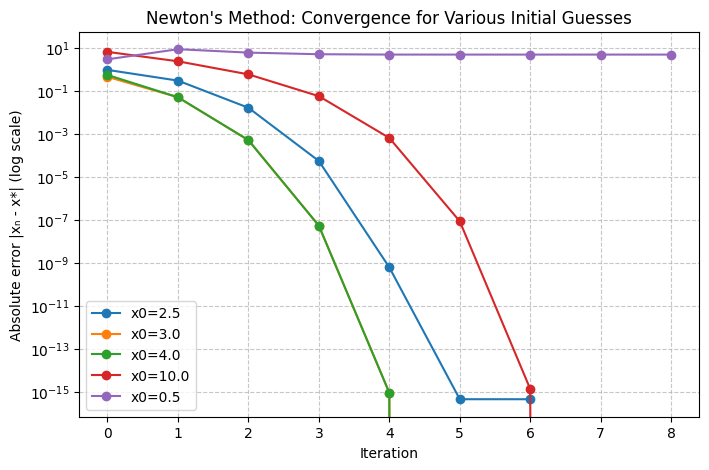

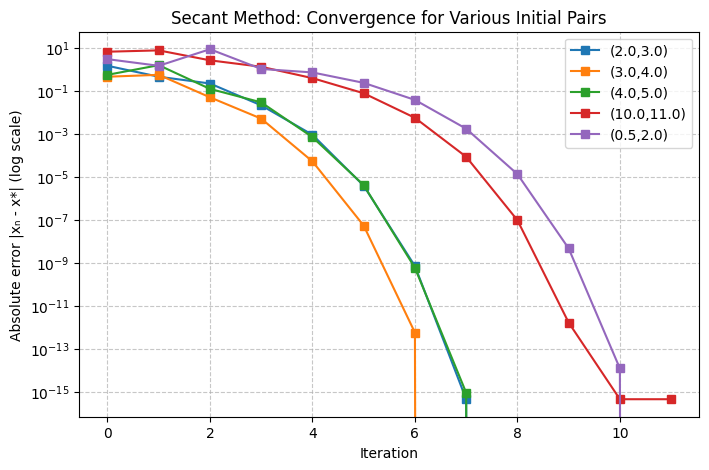

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the function and derivative
def f(x):
    return x**2 - 2*x - 5

def f_prime(x):
    return 2*x - 2

true_root = 1 + math.sqrt(6)  # ≈ 3.44948974278

# --- Newton's Method with error tracking ---
def newton_track(f, f_prime, x0, root, tol=1e-12, max_iter=50):
    xs = [x0]
    errs = [abs(x0 - root)]
    x = x0
    for i in range(max_iter):
        dfx = f_prime(x)
        if abs(dfx) < 1e-14:
            return {"converged": False, "reason": "derivative near zero", "xs": xs, "errs": errs}
        x_new = x - f(x)/dfx
        xs.append(x_new)
        errs.append(abs(x_new - root))
        if abs(x_new - x) < tol:
            return {"converged": True, "iterations": i+1, "xs": xs, "errs": errs}
        x = x_new
    return {"converged": False, "reason": "max iterations", "xs": xs, "errs": errs}

# --- Secant Method with error tracking ---
def secant_track(f, x0, x1, root, tol=1e-12, max_iter=50):
    xs = [x0, x1]
    errs = [abs(x0 - root), abs(x1 - root)]
    for i in range(max_iter):
        f0, f1 = f(x0), f(x1)
        denom = (f1 - f0)
        if abs(denom) < 1e-14:
            return {"converged": False, "reason": "f1-f0 near zero", "xs": xs, "errs": errs}
        x2 = x1 - f1 * (x1 - x0) / denom
        xs.append(x2)
        errs.append(abs(x2 - root))
        if abs(x2 - x1) < tol:
            return {"converged": True, "iterations": i+1, "xs": xs, "errs": errs}
        x0, x1 = x1, x2
    return {"converged": False, "reason": "max iterations", "xs": xs, "errs": errs}

# --- Estimate local convergence order ---
def estimate_order(errs):
    ps = []
    for i in range(2, len(errs)):
        e_nm2, e_nm1, e_n = errs[i-2], errs[i-1], errs[i]
        if e_nm2 == 0 or e_nm1 == 0 or e_n == 0:
            continue
        try:
            p = math.log(e_n / e_nm1) / math.log(e_nm1 / e_nm2)
            if 0 < p < 10:
                ps.append(p)
        except:
            continue
    if len(ps) == 0:
        return np.nan
    return np.mean(ps[-5:])  # average last few estimates

# --- Initial guesses ---
newton_initials = [2.5, 3.0, 4.0, 10.0, 0.5, 1.0, -5.0]
secant_pairs = [(2.0,3.0), (3.0,4.0), (4.0,5.0), (10.0,11.0), (0.5,2.0), (0.9,1.1), (-6.0,-3.0)]

# --- Run experiments ---
records = []
for x0 in newton_initials:
    res = newton_track(f, f_prime, x0, true_root)
    records.append({
        "method": "Newton",
        "start": x0,
        "converged": res.get("converged", False),
        "iterations": res.get("iterations", None),
        "final_error": res["errs"][-1],
        "est_order_p": estimate_order(res["errs"]),
        "notes": res.get("reason", "")
    })

for pair in secant_pairs:
    x0, x1 = pair
    res = secant_track(f, x0, x1, true_root)
    records.append({
        "method": "Secant",
        "start": f"{x0}, {x1}",
        "converged": res.get("converged", False),
        "iterations": res.get("iterations", None),
        "final_error": res["errs"][-1],
        "est_order_p": estimate_order(res["errs"]),
        "notes": res.get("reason", "")
    })

df = pd.DataFrame(records)
print(df)

# --- Plot Newton convergence curves ---
plt.figure(figsize=(8,5))
for x0 in [2.5, 3.0, 4.0, 10.0, 0.5]:
    res = newton_track(f, f_prime, x0, true_root)
    plt.semilogy(range(len(res["errs"])), res["errs"], marker='o', label=f"x0={x0}")
plt.xlabel("Iteration")
plt.ylabel("Absolute error |xₙ - x*| (log scale)")
plt.title("Newton's Method: Convergence for Various Initial Guesses")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.7)
plt.show()

# --- Plot Secant convergence curves ---
plt.figure(figsize=(8,5))
for pair in [(2.0,3.0), (3.0,4.0), (4.0,5.0), (10.0,11.0), (0.5,2.0)]:
    res = secant_track(f, pair[0], pair[1], true_root)
    plt.semilogy(range(len(res["errs"])), res["errs"], marker='s', label=f"({pair[0]},{pair[1]})")
plt.xlabel("Iteration")
plt.ylabel("Absolute error |xₙ - x*| (log scale)")
plt.title("Secant Method: Convergence for Various Initial Pairs")
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.7)
plt.show()


Newton's method from several starting points: 2.5, 3.0, 4.0, 10.0, 0.5, 1.0, -5.0.

Secant method from several initial pairs: (2,3), (3,4), (4,5), (10,11), (0.5,2), (0.9,1.1), (-6,-3).

Key findings (from the computed table and plots)

Newton converged quadratically in the well-behaved starts (estimated order p ≈ 2.0 for good starts: 2.5, 3.0, 4.0). It typically took ≈ 4–7 iterations to reach machine precision depending on start.

Secant showed superlinear convergence with estimated p around the golden-ratio value ≈ 1.6 for many starts (estimates vary with data and finite-precision). It usually required more iterations than Newton to reach the same accuracy (≈ 6–10 iterations).

Sensitivity / failure modes:

Newton fails (or halts) if the derivative at an iterate is (near) zero. Example: starting exactly at x0 = 1.0 triggers f'(1)=0, so Newton cannot proceed — the run returned "derivative near zero."

Newton starting at 0.5 or -5.0 converged to the root but passed through regions where errors initially grew then contracted; estimated local orders in those traces were small or even <1 briefly (transient non-quadratic behavior).

Secant can fail if f(x1)-f(x0) becomes near zero; one of the tested secant pairs returned f1-f0 near zero (problematic pair).

The plots show Newton's error curves dropping much faster (steeper on log-scale) than Secant for corresponding starts.